# Capstone Project - The Battle of Neighborhoods week(1-2)

## Business Problem Section

### Background

According to PIE News and World Atlas,the indian population is increasing Rapidly in Canada.Given the facts and figures, Toronto, the provincial capital of Ontario, is the most preferred city for Indians immigrating to Canada. As of 2016, the Greater Toronto Area had 995,125 South Asian Canadians. The history of Indo-Canadians in Toronto is more recent than that in British Columbia. It started around the 1960s. Today, the Indian-origin population is concentrated in the Etobicoke and Scarborough areas of Toronto and in the suburbs of Mississauga, Markham, and Brampton.


## Business Problem

The business problem we are currently posing is: Which is the best locality/Neighborhood to start an indian restaurant, So that it will make a considerable profit. To solve this business problem, we are going to cluster Torronto neighborhoods to check the frequency of indian restaurants and other venue types in order to recommend right venue.


## Data Section

Data required for this analysis is Neighborhoods of toronto city and its latitudes and longitudes. We get this information from wikipedia page(https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M") and its corresponding latitude and longitudes data from this link' http://cocl.us/Geospatial_data'.

To explore and target recommended locations across different venues according to the presence of indian restaurants, For this we will access wikipedia page and scrape it into pandas dataframe and merge the dataframe with geospatial data to get latitude and logitude data for each neighborhood,then by using Four squares API I am going to get the nearby venues for each neighborhood and then plot the distribution of the venues across the neighborhood. Then cluster the neighborhoods based on the frequency of indian restaurants. So that we are able to recommand best locality to start an indian restaurant.

## Methodology

The Methodology section will describe the main components of our analysis and predication system. The Methodology section comprises four stages:

1 .Collect Required Data
2 .Explore and Understand Data
3 .Data preparation and preprocessing
4 .Modeling

###  Collect Required Data

In [1]:
import pandas as pd
!conda install -c anaconda lxml --yes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np # library to handle data in a vectorized manner
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
import json # library to handle JSON files

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         156 KB  anaconda

The following packages will be UPDATED:

    ca-certificates: 2019.11.28-hecc5488_0 conda-forge --> 2020.1.1-0        anaconda
    certifi:         2019.11.28-py36_0     conda-forge --> 2019.11.28-py36_0 anaconda
    openssl:         1.1.1d-h516909a_0     conda-forge --> 1.1.1-h7b6447c_0  anaconda


certifi-2019.11.28   | 156 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded

In [2]:
# Scrapping wikipedia page using pandas
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')[0]
df.drop(df.loc[df['Borough']=='Not assigned'].index, inplace=True)
df

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Downtown Toronto,Queen's Park
9,M9A,Queen's Park,Not assigned
10,M1B,Scarborough,Rouge
11,M1B,Scarborough,Malvern
13,M3B,North York,Don Mills North


In [3]:
df = df.groupby(['Postcode','Borough'], sort=False).agg(', '.join)
df.reset_index(inplace=True)

In [4]:
lat_lon = pd.read_csv('https://cocl.us/Geospatial_data')
lat_lon.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### Data Preparation and preprocessing.


At this stage, we prepare our dataset for the modeling process, opting for the most suitable machine learning algorithm for our scope. Accordingly, we perform the following steps:

1. Rename the column name Postal code  of geospatial data to Postcode.
2. Merge the two dataframes 
3. Plot the coordinates of the neighborhoods on map.

In [5]:
lat_lon.rename(columns={'Postal Code':'Postcode'},inplace=True)
df = pd.merge(df,lat_lon,on='Postcode')
df

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494
5,M9A,Queen's Park,Not assigned,43.667856,-79.532242
6,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937
9,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937


In [7]:

address = 'Toronto, Canada'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.653963, -79.387207.


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


In [20]:
map_toronto = folium.Map(location=[43.653963,-79.387207],zoom_start=10)

for lat,lng,borough,neighbourhood in zip(df['Latitude'],df['Longitude'],df['Borough'],df['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_toronto)
map_toronto

In [21]:
df1 = df['Borough'].value_counts()
df1

North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           11
Central Toronto      9
West Toronto         6
East York            5
York                 5
East Toronto         5
Mississauga          1
Queen's Park         1
Name: Borough, dtype: int64

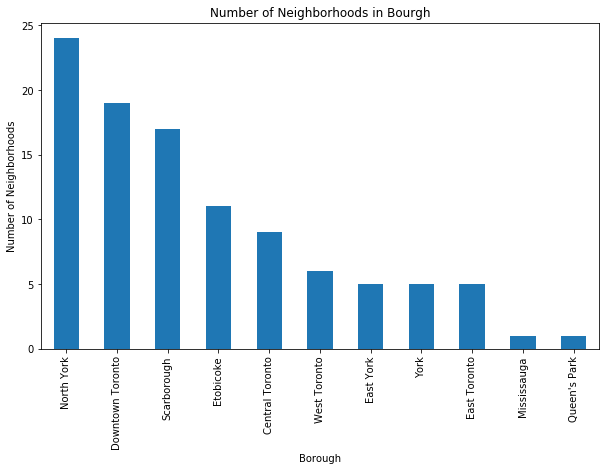

In [23]:
import matplotlib.pyplot as plt
df1.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Borough')
plt.ylabel('Number of Neighborhoods')
plt.title('Number of Neighborhoods in Bourgh')
plt.show()

From above bar garph we can see that majority of neighborhoods are in North York, Downtown Toronto ,Scarboroughand etobiccoke. So, we will concentrate our analysis on these four Bouroghs.

In [67]:
NY_data = df[df['Borough'] == 'North York'].reset_index(drop=True)
NY_data.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
3,M3B,North York,Don Mills North,43.745906,-79.352188
4,M6B,North York,Glencairn,43.709577,-79.445073


In [68]:
DT_data = df[df['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
DT_data.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
1,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494
2,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


In [69]:
Scarborough_data = df[df['Borough'] == 'Scarborough'].reset_index(drop=True)
Scarborough_data.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [141]:
Etobicoke_data =  df[df['Borough'] == 'Etobicoke'].reset_index(drop=True)
Etobicoke_data.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M9B,Etobicoke,"Cloverdale, Islington, Martin Grove, Princess ...",43.650943,-79.554724
1,M9C,Etobicoke,"Bloordale Gardens, Eringate, Markland Wood, Ol...",43.643515,-79.577201
2,M9P,Etobicoke,Westmount,43.696319,-79.532242
3,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv...",43.688905,-79.554724
4,M8V,Etobicoke,"Humber Bay Shores, Mimico South, New Toronto",43.605647,-79.501321


In [10]:
CLIENT_ID = 'GYVNICRSGEZKHP425XIAWDWIUV0CNO2TM3103MYUNWQDX215' # your Foursquare ID
CLIENT_SECRET = 'BUYYXGVQI2VB0QO1IK0WWLJFL5TZIKGNRYTN1QWKCNDVBV4D' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GYVNICRSGEZKHP425XIAWDWIUV0CNO2TM3103MYUNWQDX215
CLIENT_SECRET:BUYYXGVQI2VB0QO1IK0WWLJFL5TZIKGNRYTN1QWKCNDVBV4D


### Modelling

In [25]:
neighborhood_latitude = NY_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = NY_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = NY_data.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Parkwoods are 43.7532586, -79.3296565.


In [26]:
LIMIT =100
radius = 1000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

url


'https://api.foursquare.com/v2/venues/explore?&client_id=GYVNICRSGEZKHP425XIAWDWIUV0CNO2TM3103MYUNWQDX215&client_secret=BUYYXGVQI2VB0QO1IK0WWLJFL5TZIKGNRYTN1QWKCNDVBV4D&v=20180605&ll=43.7532586,-79.3296565&radius=1000&limit=100'

In [27]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e3f90ae6d8c56001b8a73fe'},
 'response': {'headerLocation': 'Parkwoods - Donalda',
  'headerFullLocation': 'Parkwoods - Donalda, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 29,
  'suggestedBounds': {'ne': {'lat': 43.762258609000014,
    'lng': -79.31721997969855},
   'sw': {'lat': 43.74425859099999, 'lng': -79.34209302030145}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b8991cbf964a520814232e3',
       'name': "Allwyn's Bakery",
       'location': {'address': '81 Underhill drive',
        'lat': 43.75984035203157,
        'lng': -79.32471879917513,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.75984035203157,
          'lng': -79.32471879917513}],
        'distance': 833,
    

In [28]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [29]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Allwyn's Bakery,Caribbean Restaurant,43.759840,-79.324719
1,Brookbanks Park,Park,43.751976,-79.332140
2,Tim Hortons,Café,43.760668,-79.326368
3,Bruno's valu-mart,Grocery Store,43.746143,-79.324630
4,A&W,Fast Food Restaurant,43.760643,-79.326865
5,Food Basics,Supermarket,43.760865,-79.326015
6,High Street Fish & Chips,Fish & Chips Shop,43.745260,-79.324949
7,Shoppers Drug Mart,Pharmacy,43.745315,-79.325800
8,Shoppers Drug Mart,Pharmacy,43.760857,-79.324961
9,Variety Store,Food & Drink Shop,43.751974,-79.333114


In [30]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [32]:
NY_venues = getNearbyVenues(names=NY_data['Neighbourhood'],
                                   latitudes=NY_data['Latitude'],
                                   longitudes=NY_data['Longitude']
                                  )

Parkwoods
Victoria Village
Lawrence Heights, Lawrence Manor
Don Mills North
Glencairn
Flemingdon Park, Don Mills South
Hillcrest Village
Bathurst Manor, Downsview North, Wilson Heights
Fairview, Henry Farm, Oriole
Northwood Park, York University
Bayview Village
CFB Toronto, Downsview East
Silver Hills, York Mills
Downsview West
Downsview, North Park, Upwood Park
Humber Summit
Newtonbrook, Willowdale
Downsview Central
Bedford Park, Lawrence Manor East
Emery, Humberlea
Willowdale South
Downsview Northwest
York Mills West
Willowdale West


In [35]:
print(NY_venues.shape)
NY_venues

(242, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
5,Victoria Village,43.725882,-79.315572,Eglinton Ave E & Sloane Ave/Bermondsey Rd,43.726086,-79.313620,Intersection
6,Victoria Village,43.725882,-79.315572,Pizza Nova,43.725824,-79.312860,Pizza Place
7,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,Roots,43.718221,-79.466776,Boutique
8,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,Kitchen Stuff Plus (Clearance Outlet),43.719096,-79.462675,Furniture / Home Store
9,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,Lac Vien Vietnamese Restaurant,43.721259,-79.468472,Vietnamese Restaurant


In [36]:
NY_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Bathurst Manor, Downsview North, Wilson Heights",21,21,21,21,21,21
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",25,25,25,25,25,25
"CFB Toronto, Downsview East",4,4,4,4,4,4
Don Mills North,5,5,5,5,5,5
Downsview Central,3,3,3,3,3,3
Downsview Northwest,4,4,4,4,4,4
Downsview West,4,4,4,4,4,4
"Downsview, North Park, Upwood Park",4,4,4,4,4,4


In [39]:
print('There are {} uniques categories.'.format(len(NY_venues['Venue Category'].unique())))

There are 105 uniques categories.


In [40]:
# one hot encoding
NY_onehot = pd.get_dummies(NY_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe

NY_onehot['Neighborhood'] = NY_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [NY_onehot.columns[-1]] + list(NY_onehot.columns[:-1])
NY_onehot = NY_onehot[fixed_columns]

NY_onehot.head()

,Neighborhood,Accessories Store,Airport,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Store,Bike Shop,Bookstore,Boutique,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Butcher,Cafeteria,Café,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Electronics Store,Empanada Restaurant,Event Space,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hockey Arena,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Liquor Store,Lounge,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salon / Barbershop,Sandwich Place,Shoe Store,Shopping Mall,Snack Place,Sporting Goods Shop,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Video Game Store,Video Store,Vietnamese Restaurant,Wings Joint,Women's Store
0,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
NY_grouped = NY_onehot.groupby('Neighborhood').mean().reset_index()
NY_grouped

,Neighborhood,Accessories Store,Airport,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Store,Bike Shop,Bookstore,Boutique,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Butcher,Cafeteria,Café,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Electronics Store,Empanada Restaurant,Event Space,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hockey Arena,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Liquor Store,Lounge,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salon / Barbershop,Sandwich Place,Shoe Store,Shopping Mall,Snack Place,Sporting Goods Shop,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Video Game Store,Video Store,Vietnamese Restaurant,Wings Joint,Women's Store
0,"Bathurst Manor, Downsview North, Wilson Heights",0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.047619,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.047619,0.000000,0.000000,0.095238,0.00,0.000000,0.00,0.000000,0.000000,0.047619,0.000000,0.000000,0.047619,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.047619,0.047619,0.00,0.047619,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.047619,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.047619,0.000000,0.000000,0.000000,0.00,0.047619,0.047619,0.047619,0.000000,0.00,0.0,0.00,0.000000,0.047619,0.000000,0.047619,0.000000,0.047619,0.00,0.000000,0.000000,0.047619,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000
1,Bayview Village,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.250000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.250000,0.00,0.250000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.250000,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Bedford Park, Lawrence Manor East",0.000000,0.00,0.040000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.04,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.0,0.040000,0.00,0.000000,0.000000,0.000000,0.080000,0.04,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.080000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.040000,0.040000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.04,0.000000,0.0,0.080000,0.000000,0.040000,0.040000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.040000,0.040000,0.040000,0.000000,0.00,0.0,0.04,0.000000,0.040000,0.000000,0.080000,0.000000,0.0000

In [44]:
num_top_venues = 10

for hood in NY_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = NY_grouped[NY_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bathurst Manor, Downsview North, Wilson Heights----
                       venue  freq
0                Coffee Shop  0.10
1                Supermarket  0.05
2                  Pet Store  0.05
3                   Pharmacy  0.05
4                Pizza Place  0.05
5                      Diner  0.05
6  Middle Eastern Restaurant  0.05
7         Chinese Restaurant  0.05
8                 Restaurant  0.05
9             Sandwich Place  0.05


----Bayview Village----
                 venue  freq
0   Chinese Restaurant  0.25
1                 Café  0.25
2                 Bank  0.25
3  Japanese Restaurant  0.25
4    Accessories Store  0.00
5               Lounge  0.00
6            Pet Store  0.00
7                 Park  0.00
8        Movie Theater  0.00
9    Mobile Phone Shop  0.00


----Bedford Park, Lawrence Manor East----
                     venue  freq
0              Coffee Shop  0.08
1           Sandwich Place  0.08
2     Fast Food Restaurant  0.08
3       Italian Restaurant  0.08
4    

                  venue  freq
0           Pizza Place  0.17
1           Coffee Shop  0.17
2              Pharmacy  0.17
3               Butcher  0.17
4        Discount Store  0.17
5         Grocery Store  0.17
6        Ice Cream Shop  0.00
7     Indian Restaurant  0.00
8  Gym / Fitness Center  0.00
9             Pet Store  0.00


----York Mills West----
                       venue  freq
0                       Park  0.50
1          Convenience Store  0.25
2                       Bank  0.25
3          Accessories Store  0.00
4               Liquor Store  0.00
5                  Pet Store  0.00
6              Movie Theater  0.00
7          Mobile Phone Shop  0.00
8         Miscellaneous Shop  0.00
9  Middle Eastern Restaurant  0.00




In [45]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [162]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted0 = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted0['Neighborhood'] = NY_grouped['Neighborhood']

for ind in np.arange(NY_grouped.shape[0]):
    neighborhoods_venues_sorted0.iloc[ind, 1:] = return_most_common_venues(NY_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted0

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bathurst Manor, Downsview North, Wilson Heights",Coffee Shop,Sandwich Place,Pizza Place,Ice Cream Shop,Pharmacy,Deli / Bodega,Restaurant,Pet Store,Chinese Restaurant,Shopping Mall
1,Bayview Village,Chinese Restaurant,Café,Bank,Japanese Restaurant,Discount Store,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop
2,"Bedford Park, Lawrence Manor East",Fast Food Restaurant,Italian Restaurant,Coffee Shop,Sandwich Place,Restaurant,Breakfast Spot,Juice Bar,Café,Butcher,American Restaurant
3,"CFB Toronto, Downsview East",Airport,Construction & Landscaping,Park,Snack Place,Women's Store,Diner,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall
4,Don Mills North,Japanese Restaurant,Caribbean Restaurant,Café,Gym / Fitness Center,Basketball Court,Women's Store,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store
5,Downsview Central,Food Truck,Home Service,Baseball Field,Women's Store,Discount Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store
6,Downsview Northwest,Grocery Store,Athletics & Sports,Gym / Fitness Center,Liquor Store,Women's Store,Discount Store,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store
7,Downsview West,Grocery Store,Bank,Park,Shopping Mall,Women's Store,Diner,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall
8,"Downsview, North Park, Upwood Park",Construction & Landscaping,Bakery,Basketball Court,Park,Women's Store,Discount Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store
9,"Emery, Humberlea",Construction & Landscaping,Baseball Field,Women's Store,Discount Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Deli / Bodega


## Clustering of Neighborhoods for North York

In [163]:
# set number of clusters
kclusters = 5

NY_grouped_clustering = NY_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(NY_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 4, 0, 2, 0, 0, 4, 2], dtype=int32)

In [164]:
neighborhoods_venues_sorted0.insert(0, 'Cluster Labels', kmeans.labels_)

NY_merged = NY_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
NY_merged = NY_merged.join(neighborhoods_venues_sorted0.set_index('Neighborhood'), on='Neighbourhood')

NY_merged.head() # check the last columns!

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,3,Park,Food & Drink Shop,Diner,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop
1,M4A,North York,Victoria Village,43.725882,-79.315572,0,Pizza Place,Coffee Shop,Portuguese Restaurant,Hockey Arena,Intersection,Women's Store,Dim Sum Restaurant,Clothing Store,Comfort Food Restaurant,Concert Hall
2,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,0,Furniture / Home Store,Clothing Store,Boutique,Event Space,Miscellaneous Shop,Coffee Shop,Accessories Store,Vietnamese Restaurant,Athletics & Sports,Discount Store
3,M3B,North York,Don Mills North,43.745906,-79.352188,0,Japanese Restaurant,Caribbean Restaurant,Café,Gym / Fitness Center,Basketball Court,Women's Store,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store
4,M6B,North York,Glencairn,43.709577,-79.445073,0,Pizza Place,Bakery,Pub,Japanese Restaurant,Women's Store,Dim Sum Restaurant,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping


### Examine Clusters


Now,we examine each cluster and determine the discriminating venue categories that distinguish each cluster.So,that we can identify which is the best cluster for our problem.

In [167]:
NY_merged.loc[NY_merged['Cluster Labels'] == 0, NY_merged.columns[[2] + list(range(5, NY_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Victoria Village,0,Pizza Place,Coffee Shop,Portuguese Restaurant,Hockey Arena,Intersection,Women's Store,Dim Sum Restaurant,Clothing Store,Comfort Food Restaurant,Concert Hall
2,"Lawrence Heights, Lawrence Manor",0,Furniture / Home Store,Clothing Store,Boutique,Event Space,Miscellaneous Shop,Coffee Shop,Accessories Store,Vietnamese Restaurant,Athletics & Sports,Discount Store
3,Don Mills North,0,Japanese Restaurant,Caribbean Restaurant,Café,Gym / Fitness Center,Basketball Court,Women's Store,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store
4,Glencairn,0,Pizza Place,Bakery,Pub,Japanese Restaurant,Women's Store,Dim Sum Restaurant,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping
5,"Flemingdon Park, Don Mills South",0,Coffee Shop,Beer Store,Asian Restaurant,Gym,Chinese Restaurant,Concert Hall,Japanese Restaurant,Italian Restaurant,Dim Sum Restaurant,Restaurant
6,Hillcrest Village,0,Golf Course,Pool,Mediterranean Restaurant,Dog Run,Dim Sum Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping
7,"Bathurst Manor, Downsview North, Wilson Heights",0,Coffee Shop,Sandwich Place,Pizza Place,Ice Cream Shop,Pharmacy,Deli / Bodega,Restaurant,Pet Store,Chinese Restaurant,Shopping Mall
8,"Fairview, Henry Farm, Oriole",0,Clothing Store,Fast Food Restaurant,Coffee Shop,Shoe Store,Tea Room,Juice Bar,Japanese Restaurant,Bakery,Women's Store,Greek Restaurant
9,"Northwood Park, York University",0,Coffee Shop,Caribbean Restaurant,Massage Studio,Bar,Discount Store,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop
10,Bayview Village,0,Chinese Restaurant,Café,Bank,Japanese Restaurant,Discount Store,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop


In [168]:
NY_merged.loc[NY_merged['Cluster Labels'] == 1, NY_merged.columns[[2] + list(range(5, NY_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,"Newtonbrook, Willowdale",1,Gym,Women's Store,Discount Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega


In [169]:
NY_merged.loc[NY_merged['Cluster Labels'] == 2, NY_merged.columns[[2] + list(range(5, NY_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Downsview Central,2,Food Truck,Home Service,Baseball Field,Women's Store,Discount Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store
19,"Emery, Humberlea",2,Construction & Landscaping,Baseball Field,Women's Store,Discount Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Deli / Bodega


In [170]:
NY_merged.loc[NY_merged['Cluster Labels'] == 3, NY_merged.columns[[2] + list(range(5, NY_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Parkwoods,3,Park,Food & Drink Shop,Diner,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop
22,York Mills West,3,Park,Convenience Store,Bank,Discount Store,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Cosmetics Shop


In [171]:
NY_merged.loc[NY_merged['Cluster Labels'] == 4, NY_merged.columns[[2] + list(range(5, NY_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,"CFB Toronto, Downsview East",4,Airport,Construction & Landscaping,Park,Snack Place,Women's Store,Diner,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall
14,"Downsview, North Park, Upwood Park",4,Construction & Landscaping,Bakery,Basketball Court,Park,Women's Store,Discount Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store


### Clustering of Neighborhoods of  Down town Toronto . 

In [70]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [71]:
DT_venues = getNearbyVenues(names=DT_data['Neighbourhood'],
                                   latitudes=DT_data['Latitude'],
                                   longitudes=DT_data['Longitude']
                                  )

Harbourfront
Queen's Park
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Christie
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Rosedale
Stn A PO Boxes 25 The Esplanade
Cabbagetown, St. James Town
First Canadian Place, Underground city
Church and Wellesley


In [73]:
print(DT_venues.shape)
DT_venues

(1296, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Harbourfront,43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,Harbourfront,43.654260,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,Harbourfront,43.654260,-79.360636,Cooper Koo Family YMCA,43.653191,-79.357947,Gym / Fitness Center
3,Harbourfront,43.654260,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,Harbourfront,43.654260,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
5,Harbourfront,43.654260,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
6,Harbourfront,43.654260,-79.360636,Dominion Pub and Kitchen,43.656919,-79.358967,Pub
7,Harbourfront,43.654260,-79.360636,Corktown Common,43.655618,-79.356211,Park
8,Harbourfront,43.654260,-79.360636,Figs Breakfast & Lunch,43.655675,-79.364503,Breakfast Spot
9,Harbourfront,43.654260,-79.360636,The Distillery Historic District,43.650244,-79.359323,Historic Site


In [74]:
DT_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Berczy Park,55,55,55,55,55,55
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",16,16,16,16,16,16
"Cabbagetown, St. James Town",42,42,42,42,42,42
Central Bay Street,84,84,84,84,84,84
"Chinatown, Grange Park, Kensington Market",80,80,80,80,80,80
Christie,18,18,18,18,18,18
Church and Wellesley,81,81,81,81,81,81
"Commerce Court, Victoria Hotel",100,100,100,100,100,100


In [75]:
# one hot encoding
DT_onehot = pd.get_dummies(DT_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe

DT_onehot['Neighborhood'] = DT_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [DT_onehot.columns[-1]] + list(DT_onehot.columns[:-1])
DT_onehot = DT_onehot[fixed_columns]

DT_onehot.head()

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Harbourfront,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Harbourfront,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Harbourfront,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [76]:
DT_grouped = DT_onehot.groupby('Neighborhood').mean().reset_index()
DT_grouped

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store
0,"Adelaide, King, Richmond",0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.020000,0.000000,0.00,0.010000,0.000000,0.03,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.040000,0.00,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.0000,0.020000,0.01,0.030000,0.0000,0.000000,0.01,0.030000,0.010000,0.000000,0.040000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000,0.00,0.01,0.000000,0.000000,0.020000,0.00000,0.030000,0.000000,0.000000,0.010000,0.010000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0100,0.000000,0.000000,0.000000,0.000000,0.010000,0.0000,0.000000,0.020000,0.000000,0.000000,0.01,0.00,0.01000,0.01,0.000000,0.000000,0.000000,0.020000,0.010000,0.0000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.0000,0.000000,0.020000,0.0000,0.00,0.010000,0.010000,0.000000,0.010000,0.010000,0.00000,0.010000,0.000000,0.00,0.01,0.01,0.000000,0.010000,0.00000,0.010000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.01,0.000000,0.000000,0.00,0.01,

In [77]:
num_top_venues = 10

for hood in DT_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = DT_grouped[DT_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
              venue  freq
0       Coffee Shop  0.07
1        Steakhouse  0.04
2              Café  0.04
3               Bar  0.04
4  Asian Restaurant  0.03
5    Cosmetics Shop  0.03
6      Burger Joint  0.03
7    Breakfast Spot  0.03
8            Bakery  0.03
9   Thai Restaurant  0.03


----Berczy Park----
                venue  freq
0         Coffee Shop  0.07
1        Cocktail Bar  0.05
2            Beer Bar  0.04
3  Seafood Restaurant  0.04
4      Farmers Market  0.04
5              Bakery  0.04
6                Café  0.04
7          Steakhouse  0.04
8         Cheese Shop  0.04
9         Fish Market  0.02


----CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara----
                 venue  freq
0      Airport Service  0.19
1       Airport Lounge  0.12
2     Airport Terminal  0.12
3                  Bar  0.06
4          Coffee Shop  0.06
5              Airport  0.06
6   Airport Food Court  0.06
7 

In [78]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [82]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted1 = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted1['Neighborhood'] = DT_grouped['Neighborhood']

for ind in np.arange(DT_grouped.shape[0]):
    neighborhoods_venues_sorted1.iloc[ind, 1:] = return_most_common_venues(DT_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted1

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Bar,Steakhouse,Thai Restaurant,Cosmetics Shop,Burger Joint,Asian Restaurant,Bakery,Breakfast Spot
1,Berczy Park,Coffee Shop,Cocktail Bar,Cheese Shop,Steakhouse,Seafood Restaurant,Bakery,Café,Beer Bar,Farmers Market,Diner
2,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Service,Airport Terminal,Airport Lounge,Boat or Ferry,Rental Car Location,Harbor / Marina,Coffee Shop,Sculpture Garden,Airport Gate,Airport Food Court
3,"Cabbagetown, St. James Town",Coffee Shop,Restaurant,Pizza Place,Bakery,Italian Restaurant,Café,Pub,Playground,Indian Restaurant,Japanese Restaurant
4,Central Bay Street,Coffee Shop,Sandwich Place,Ice Cream Shop,Café,Italian Restaurant,Burger Joint,Juice Bar,Japanese Restaurant,Department Store,Bar
5,"Chinatown, Grange Park, Kensington Market",Bar,Café,Dumpling Restaurant,Vietnamese Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Chinese Restaurant,Mexican Restaurant,Donut Shop,Dessert Shop
6,Christie,Grocery Store,Café,Park,Athletics & Sports,Nightclub,Candy Store,Restaurant,Diner,Italian Restaurant,Baby Store
7,Church and Wellesley,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Gay Bar,Restaurant,Hotel,Fast Food Restaurant,Mediterranean Restaurant,Men's Store,Gym
8,"Commerce Court, Victoria Hotel",Coffee Shop,Café,Hotel,Restaurant,Bakery,Deli / Bodega,Gym,American Restaurant,Steakhouse,Gastropub
9,"Design Exchange, Toronto Dominion Centre",Coffee Shop,Café,Hotel,Steakhouse,Restaurant,Italian Restaurant,Bar,Gastropub,Seafood Restaurant,Deli / Bodega


In [83]:
# set number of clusters
kclusters = 5

DT_grouped_clustering = DT_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(DT_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 3, 2, 2, 2, 4, 2, 2, 2], dtype=int32)

In [84]:
neighborhoods_venues_sorted1.insert(0, 'Cluster Labels', kmeans.labels_)

DT_merged = DT_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
DT_merged = DT_merged.join(neighborhoods_venues_sorted1.set_index('Neighborhood'), on='Neighbourhood')

DT_merged.head() # check the last columns!

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636,0,Coffee Shop,Pub,Park,Café,Bakery,Mexican Restaurant,Breakfast Spot,Restaurant,Ice Cream Shop,Spa
1,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494,0,Coffee Shop,Gym,Park,Yoga Studio,College Auditorium,Sandwich Place,Salad Place,Restaurant,Portuguese Restaurant,Burger Joint
2,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,2,Coffee Shop,Clothing Store,Japanese Restaurant,Café,Cosmetics Shop,Bubble Tea Shop,Ramen Restaurant,Restaurant,Bakery,Middle Eastern Restaurant
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,2,Coffee Shop,Café,Restaurant,Cocktail Bar,American Restaurant,Bakery,Cosmetics Shop,Breakfast Spot,Clothing Store,Hotel
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,2,Coffee Shop,Cocktail Bar,Cheese Shop,Steakhouse,Seafood Restaurant,Bakery,Café,Beer Bar,Farmers Market,Diner


In [85]:
DT_merged

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636,0,Coffee Shop,Pub,Park,Café,Bakery,Mexican Restaurant,Breakfast Spot,Restaurant,Ice Cream Shop,Spa
1,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494,0,Coffee Shop,Gym,Park,Yoga Studio,College Auditorium,Sandwich Place,Salad Place,Restaurant,Portuguese Restaurant,Burger Joint
2,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,2,Coffee Shop,Clothing Store,Japanese Restaurant,Café,Cosmetics Shop,Bubble Tea Shop,Ramen Restaurant,Restaurant,Bakery,Middle Eastern Restaurant
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,2,Coffee Shop,Café,Restaurant,Cocktail Bar,American Restaurant,Bakery,Cosmetics Shop,Breakfast Spot,Clothing Store,Hotel
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,2,Coffee Shop,Cocktail Bar,Cheese Shop,Steakhouse,Seafood Restaurant,Bakery,Café,Beer Bar,Farmers Market,Diner
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,2,Coffee Shop,Sandwich Place,Ice Cream Shop,Café,Italian Restaurant,Burger Joint,Juice Bar,Japanese Restaurant,Department Store,Bar
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564,4,Grocery Store,Café,Park,Athletics & Sports,Nightclub,Candy Store,Restaurant,Diner,Italian Restaurant,Baby Store
7,M5H,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568,2,Coffee Shop,Café,Bar,Steakhouse,Thai Restaurant,Cosmetics Shop,Burger Joint,Asian Restaurant,Bakery,Breakfast Spot
8,M5J,Downtown Toronto,"Harbourfront East, Toronto Islands, Union Station",43.640816,-79.381752,2,Coffee Shop,Aquarium,Café,Hotel,Italian Restaurant,Restaurant,Brewery,Scenic Lookout,Sporting Goods Shop,Fried Chicken Joint
9,M5K,Downtown Toronto,"Design Exchange, Toronto Dominion Centre",43.647177,-79.381576,2,Coffee Shop,Café,Hotel,Steakhouse,Restaurant,Italian Restaurant,Bar,Gastropub,Seafood Restaurant,Deli / Bodega


In [87]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(DT_merged['Latitude'], DT_merged['Longitude'], DT_merged['Neighbourhood'], DT_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [91]:
DT_merged.loc[DT_merged['Cluster Labels'] == 0, DT_merged.columns[[2] + list(range(5, DT_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Harbourfront,0,Coffee Shop,Pub,Park,Café,Bakery,Mexican Restaurant,Breakfast Spot,Restaurant,Ice Cream Shop,Spa
1,Queen's Park,0,Coffee Shop,Gym,Park,Yoga Studio,College Auditorium,Sandwich Place,Salad Place,Restaurant,Portuguese Restaurant,Burger Joint


In [90]:
DT_merged.loc[DT_merged['Cluster Labels'] == 1, DT_merged.columns[[2] + list(range(5, DT_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Rosedale,1,Park,Trail,Playground,Cosmetics Shop,Doner Restaurant,Dog Run,Discount Store,Diner,Dim Sum Restaurant,Dessert Shop


In [93]:
DT_merged.loc[DT_merged['Cluster Labels'] == 2, DT_merged.columns[[2] + list(range(5, DT_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"Ryerson, Garden District",2,Coffee Shop,Clothing Store,Japanese Restaurant,Café,Cosmetics Shop,Bubble Tea Shop,Ramen Restaurant,Restaurant,Bakery,Middle Eastern Restaurant
3,St. James Town,2,Coffee Shop,Café,Restaurant,Cocktail Bar,American Restaurant,Bakery,Cosmetics Shop,Breakfast Spot,Clothing Store,Hotel
4,Berczy Park,2,Coffee Shop,Cocktail Bar,Cheese Shop,Steakhouse,Seafood Restaurant,Bakery,Café,Beer Bar,Farmers Market,Diner
5,Central Bay Street,2,Coffee Shop,Sandwich Place,Ice Cream Shop,Café,Italian Restaurant,Burger Joint,Juice Bar,Japanese Restaurant,Department Store,Bar
7,"Adelaide, King, Richmond",2,Coffee Shop,Café,Bar,Steakhouse,Thai Restaurant,Cosmetics Shop,Burger Joint,Asian Restaurant,Bakery,Breakfast Spot
8,"Harbourfront East, Toronto Islands, Union Station",2,Coffee Shop,Aquarium,Café,Hotel,Italian Restaurant,Restaurant,Brewery,Scenic Lookout,Sporting Goods Shop,Fried Chicken Joint
9,"Design Exchange, Toronto Dominion Centre",2,Coffee Shop,Café,Hotel,Steakhouse,Restaurant,Italian Restaurant,Bar,Gastropub,Seafood Restaurant,Deli / Bodega
10,"Commerce Court, Victoria Hotel",2,Coffee Shop,Café,Hotel,Restaurant,Bakery,Deli / Bodega,Gym,American Restaurant,Steakhouse,Gastropub
11,"Harbord, University of Toronto",2,Café,Bar,Sandwich Place,Japanese Restaurant,Bookstore,Restaurant,Bakery,Noodle House,Beer Bar,Beer Store
12,"Chinatown, Grange Park, Kensington Market",2,Bar,Café,Dumpling Restaurant,Vietnamese Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Chinese Restaurant,Mexican Restaurant,Donut Shop,Dessert Shop


In [94]:
DT_merged.loc[DT_merged['Cluster Labels'] == 3, DT_merged.columns[[2] + list(range(5, DT_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,"CN Tower, Bathurst Quay, Island airport, Harbo...",3,Airport Service,Airport Terminal,Airport Lounge,Boat or Ferry,Rental Car Location,Harbor / Marina,Coffee Shop,Sculpture Garden,Airport Gate,Airport Food Court


In [95]:
DT_merged.loc[DT_merged['Cluster Labels'] == 4, DT_merged.columns[[2] + list(range(5, DT_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Christie,4,Grocery Store,Café,Park,Athletics & Sports,Nightclub,Candy Store,Restaurant,Diner,Italian Restaurant,Baby Store


In [96]:
Scarborough_venues = getNearbyVenues(names=Scarborough_data['Neighbourhood'],
                                   latitudes=Scarborough_data['Latitude'],
                                   longitudes=Scarborough_data['Longitude']
                                  )

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge


In [97]:
print(Scarborough_venues.shape)
Scarborough_venues

(84, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
1,"Rouge, Malvern",43.806686,-79.194353,Interprovincial Group,43.805630,-79.200378,Print Shop
2,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Chris Effects Painting,43.784343,-79.163742,Construction & Landscaping
3,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
4,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Affordable Toronto Movers,43.787919,-79.162977,Moving Target
5,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Swiss Chalet Rotisserie & Grill,43.767697,-79.189914,Pizza Place
6,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store
7,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Big Bite Burrito,43.766299,-79.190720,Mexican Restaurant
8,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Enterprise Rent-A-Car,43.764076,-79.193406,Rental Car Location
9,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Woburn Medical Centre,43.766631,-79.192286,Medical Center


In [99]:
# one hot encoding
Scarborough_onehot = pd.get_dummies(Scarborough_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe

Scarborough_onehot['Neighborhood'] = Scarborough_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Scarborough_onehot.columns[-1]] + list(Scarborough_onehot.columns[:-1])
Scarborough_onehot = Scarborough_onehot[fixed_columns]

Scarborough_onehot.head()

,Neighborhood,American Restaurant,Athletics & Sports,Bakery,Bank,Bar,Breakfast Spot,Burger Joint,Bus Line,Bus Station,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,College Stadium,Construction & Landscaping,Convenience Store,Department Store,Electronics Store,Fast Food Restaurant,Fried Chicken Joint,Gas Station,General Entertainment,Grocery Store,Gym Pool,Hakka Restaurant,Hobby Shop,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Korean Restaurant,Latin American Restaurant,Lounge,Medical Center,Mexican Restaurant,Middle Eastern Restaurant,Motel,Moving Target,Noodle House,Park,Pet Store,Pharmacy,Pizza Place,Playground,Print Shop,Rental Car Location,Sandwich Place,Shopping Mall,Skating Rink,Smoke Shop,Soccer Field,Thai Restaurant,Vietnamese Restaurant
0,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,"Highland Creek, Rouge Hill, Port Union",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Highland Creek, Rouge Hill, Port Union",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Highland Creek, Rouge Hill, Port Union",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
Scarborough_grouped = Scarborough_onehot.groupby('Neighborhood').mean().reset_index()
Scarborough_grouped

,Neighborhood,American Restaurant,Athletics & Sports,Bakery,Bank,Bar,Breakfast Spot,Burger Joint,Bus Line,Bus Station,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,College Stadium,Construction & Landscaping,Convenience Store,Department Store,Electronics Store,Fast Food Restaurant,Fried Chicken Joint,Gas Station,General Entertainment,Grocery Store,Gym Pool,Hakka Restaurant,Hobby Shop,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Korean Restaurant,Latin American Restaurant,Lounge,Medical Center,Mexican Restaurant,Middle Eastern Restaurant,Motel,Moving Target,Noodle House,Park,Pet Store,Pharmacy,Pizza Place,Playground,Print Shop,Rental Car Location,Sandwich Place,Shopping Mall,Skating Rink,Smoke Shop,Soccer Field,Thai Restaurant,Vietnamese Restaurant
0,Agincourt,0.0,0.000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.2,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.2,0.2,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.20,0.00,0.000000,0.000000,0.0
1,"Agincourt North, L'Amoreaux East, Milliken, St...",0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.500000,0.0,0.000000,0.000000,0.5,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.0
2,"Birch Cliff, Cliffside West",0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000,0.000000,0.0,0.000000,0.25,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.25,0.00,0.000000,0.000000,0.0
3,Cedarbrae,0.0,0.125,0.125000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.125,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.125000,0.125000,0.00,0.000000,0.000000,0.125,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.125000,0.0
4,"Clairlea, Golden Mile, Oakridge",0.0,0.000,0.222222,0.000000,0.000000,0.000000,0.000000,0.222222,0.111111,0.00,0.000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000,0.00,0.111111,0.0,0.111111,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.111111,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.111111,0.000000,0.0
5,"Clarks Corners, Sullivan, Tam O'Shanter",0.0,0.000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.076923,0.0,0.000000,0.00,0.000000,0.076923,0.00,0.000000,0.076923,0.076923,0.076923,0.00,0.000000,0.000000,0.000,0.00,0.000000,0.0,0.000000,0.076923,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.076923,0.000000,0.0,0.076923,0.153846,0.0,0.0,0.000000,0.000000,0.076923,0.00,0.00,0.000000,0.076923,0.0
6,"Cliffcrest, Cliffside, Scarborough Village West",0.5,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.5,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.0
7,"Dorset Park, Scarborough Town Centre, Wexford ...",0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.200000,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.

In [101]:
num_top_venues = 10

for hood in Scarborough_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Scarborough_grouped[Scarborough_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0  Latin American Restaurant   0.2
1             Breakfast Spot   0.2
2               Skating Rink   0.2
3                     Lounge   0.2
4             Clothing Store   0.2
5        American Restaurant   0.0
6                       Park   0.0
7         Italian Restaurant   0.0
8          Korean Restaurant   0.0
9             Medical Center   0.0


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
                       venue  freq
0                       Park   0.5
1                 Playground   0.5
2        American Restaurant   0.0
3               Intersection   0.0
4         Italian Restaurant   0.0
5          Korean Restaurant   0.0
6  Latin American Restaurant   0.0
7                     Lounge   0.0
8             Medical Center   0.0
9         Mexican Restaurant   0.0


----Birch Cliff, Cliffside West----
                       venue  freq
0            College Stadium  0.25
1               Skating Rink  0.25
2 

In [102]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [128]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted4 = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted4['Neighborhood'] = Scarborough_grouped['Neighborhood']

for ind in np.arange(Scarborough_grouped.shape[0]):
    neighborhoods_venues_sorted4.iloc[ind, 1:] = return_most_common_venues(Scarborough_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted4

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Clothing Store,Skating Rink,Breakfast Spot,Latin American Restaurant,Lounge,Coffee Shop,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant
1,"Agincourt North, L'Amoreaux East, Milliken, St...",Playground,Park,Vietnamese Restaurant,Clothing Store,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant,Electronics Store
2,"Birch Cliff, Cliffside West",General Entertainment,Skating Rink,Café,College Stadium,Vietnamese Restaurant,Coffee Shop,Grocery Store,Gas Station,Fried Chicken Joint,Fast Food Restaurant
3,Cedarbrae,Hakka Restaurant,Athletics & Sports,Bakery,Bank,Gas Station,Fried Chicken Joint,Caribbean Restaurant,Thai Restaurant,Construction & Landscaping,Gym Pool
4,"Clairlea, Golden Mile, Oakridge",Bakery,Bus Line,Soccer Field,Ice Cream Shop,Intersection,Park,Bus Station,Vietnamese Restaurant,Electronics Store,Convenience Store
5,"Clarks Corners, Sullivan, Tam O'Shanter",Pizza Place,Italian Restaurant,Convenience Store,Gas Station,Thai Restaurant,Bank,Shopping Mall,Fried Chicken Joint,Fast Food Restaurant,Chinese Restaurant
6,"Cliffcrest, Cliffside, Scarborough Village West",American Restaurant,Motel,Coffee Shop,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant,Electronics Store,Department Store
7,"Dorset Park, Scarborough Town Centre, Wexford ...",Indian Restaurant,Vietnamese Restaurant,Pet Store,Chinese Restaurant,Coffee Shop,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant
8,"East Birchmount Park, Ionview, Kennedy Park",Hobby Shop,Coffee Shop,Department Store,Chinese Restaurant,Gym Pool,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant
9,"Guildwood, Morningside, West Hill",Intersection,Breakfast Spot,Rental Car Location,Electronics Store,Pizza Place,Medical Center,Mexican Restaurant,Vietnamese Restaurant,Coffee Shop,Gas Station


In [124]:
# set number of clusters
kclusters = 5

Scarborough_grouped_clustering = Scarborough_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Scarborough_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:15]

array([0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 1], dtype=int32)

In [129]:
neighborhoods_venues_sorted4.insert(0, 'Cluster Labels', kmeans.labels_)


In [130]:

Scarborough_merged = Scarborough_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Scarborough_merged = Scarborough_merged.join(neighborhoods_venues_sorted4.set_index('Neighborhood'), on='Neighbourhood')

Scarborough_merged # check the last columns!

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,2.0,Fast Food Restaurant,Print Shop,Vietnamese Restaurant,Clothing Store,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Electronics Store,Department Store
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,0.0,Bar,Construction & Landscaping,Moving Target,Vietnamese Restaurant,Coffee Shop,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0.0,Intersection,Breakfast Spot,Rental Car Location,Electronics Store,Pizza Place,Medical Center,Mexican Restaurant,Vietnamese Restaurant,Coffee Shop,Gas Station
3,M1G,Scarborough,Woburn,43.770992,-79.216917,4.0,Coffee Shop,Korean Restaurant,Vietnamese Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant,Electronics Store,Department Store
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0.0,Hakka Restaurant,Athletics & Sports,Bakery,Bank,Gas Station,Fried Chicken Joint,Caribbean Restaurant,Thai Restaurant,Construction & Landscaping,Gym Pool
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,1.0,Playground,Vietnamese Restaurant,Clothing Store,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant,Electronics Store,Department Store
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029,0.0,Hobby Shop,Coffee Shop,Department Store,Chinese Restaurant,Gym Pool,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577,0.0,Bakery,Bus Line,Soccer Field,Ice Cream Shop,Intersection,Park,Bus Station,Vietnamese Restaurant,Electronics Store,Convenience Store
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476,3.0,American Restaurant,Motel,Coffee Shop,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant,Electronics Store,Department Store
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848,0.0,General Entertainment,Skating Rink,Café,College Stadium,Vietnamese Restaurant,Coffee Shop,Grocery Store,Gas Station,Fried Chicken Joint,Fast Food Restaurant


In [135]:
Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 0, DT_merged.columns[[2] + list(range(5, DT_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Highland Creek, Rouge Hill, Port Union",0.0,Bar,Construction & Landscaping,Moving Target,Vietnamese Restaurant,Coffee Shop,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant
2,"Guildwood, Morningside, West Hill",0.0,Intersection,Breakfast Spot,Rental Car Location,Electronics Store,Pizza Place,Medical Center,Mexican Restaurant,Vietnamese Restaurant,Coffee Shop,Gas Station
4,Cedarbrae,0.0,Hakka Restaurant,Athletics & Sports,Bakery,Bank,Gas Station,Fried Chicken Joint,Caribbean Restaurant,Thai Restaurant,Construction & Landscaping,Gym Pool
6,"East Birchmount Park, Ionview, Kennedy Park",0.0,Hobby Shop,Coffee Shop,Department Store,Chinese Restaurant,Gym Pool,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant
7,"Clairlea, Golden Mile, Oakridge",0.0,Bakery,Bus Line,Soccer Field,Ice Cream Shop,Intersection,Park,Bus Station,Vietnamese Restaurant,Electronics Store,Convenience Store
9,"Birch Cliff, Cliffside West",0.0,General Entertainment,Skating Rink,Café,College Stadium,Vietnamese Restaurant,Coffee Shop,Grocery Store,Gas Station,Fried Chicken Joint,Fast Food Restaurant
10,"Dorset Park, Scarborough Town Centre, Wexford ...",0.0,Indian Restaurant,Vietnamese Restaurant,Pet Store,Chinese Restaurant,Coffee Shop,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant
11,"Maryvale, Wexford",0.0,Smoke Shop,Bakery,Breakfast Spot,Middle Eastern Restaurant,Vietnamese Restaurant,College Stadium,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint
12,Agincourt,0.0,Clothing Store,Skating Rink,Breakfast Spot,Latin American Restaurant,Lounge,Coffee Shop,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant
13,"Clarks Corners, Sullivan, Tam O'Shanter",0.0,Pizza Place,Italian Restaurant,Convenience Store,Gas Station,Thai Restaurant,Bank,Shopping Mall,Fried Chicken Joint,Fast Food Restaurant,Chinese Restaurant


In [156]:
Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 1 , Scarborough_merged.columns[[2] + list(range(5, Scarborough_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Scarborough Village,1.0,Playground,Vietnamese Restaurant,Clothing Store,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant,Electronics Store,Department Store
14,"Agincourt North, L'Amoreaux East, Milliken, St...",1.0,Playground,Park,Vietnamese Restaurant,Clothing Store,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant,Electronics Store


In [153]:
Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 2 , Scarborough_merged.columns[[2] + list(range(5, Scarborough_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Rouge, Malvern",2.0,Fast Food Restaurant,Print Shop,Vietnamese Restaurant,Clothing Store,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Electronics Store,Department Store


In [154]:
Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 3 , Scarborough_merged.columns[[2] + list(range(5, Scarborough_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,"Cliffcrest, Cliffside, Scarborough Village West",3.0,American Restaurant,Motel,Coffee Shop,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant,Electronics Store,Department Store


In [155]:
Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 4 , Scarborough_merged.columns[[2] + list(range(5, Scarborough_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Woburn,4.0,Coffee Shop,Korean Restaurant,Vietnamese Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant,Electronics Store,Department Store


In [142]:
Etobicoke_venues = getNearbyVenues(names=Etobicoke_data['Neighbourhood'],
                                   latitudes=Etobicoke_data['Latitude'],
                                   longitudes=Etobicoke_data['Longitude']
                                  )

Cloverdale, Islington, Martin Grove, Princess Gardens, West Deane Park
Bloordale Gardens, Eringate, Markland Wood, Old Burnhamthorpe
Westmount
Kingsview Village, Martin Grove Gardens, Richview Gardens, St. Phillips
Humber Bay Shores, Mimico South, New Toronto
Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown
Alderwood, Long Branch
Northwest
The Kingsway, Montgomery Road, Old Mill North
Humber Bay, King's Mill Park, Kingsway Park South East, Mimico NE, Old Mill South, The Queensway East, Royal York South East, Sunnylea
Kingsway Park South West, Mimico NW, The Queensway West, Royal York South West, South of Bloor


In [146]:
Etobicoke_onehot = pd.get_dummies(Etobicoke_venues[['Venue Category']], prefix="", prefix_sep="")
Etobicoke_onehot['Neighborhood'] = Etobicoke_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Etobicoke_onehot.columns[-1]] + list(Etobicoke_onehot.columns[:-1])
Etobicoke_onehot = Etobicoke_onehot[fixed_columns]

Etobicoke_onehot.head()






,Neighborhood,Bakery,Bar,Baseball Field,Beer Store,Burger Joint,Burrito Place,Bus Line,Business Service,Café,Chinese Restaurant,Coffee Shop,Convenience Store,Cosmetics Shop,Discount Store,Drugstore,Fast Food Restaurant,Flower Shop,Fried Chicken Joint,Golf Course,Grocery Store,Gym,Hardware Store,Home Service,Intersection,Kids Store,Liquor Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Park,Pet Store,Pharmacy,Pizza Place,Pool,Pub,Rental Car Location,Restaurant,River,Sandwich Place,Seafood Restaurant,Shopping Plaza,Skating Rink,Supplement Shop,Tanning Salon,Wings Joint
0,"Cloverdale, Islington, Martin Grove, Princess ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Bloordale Gardens, Eringate, Markland Wood, Ol...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Bloordale Gardens, Eringate, Markland Wood, Ol...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Bloordale Gardens, Eringate, Markland Wood, Ol...",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Bloordale Gardens, Eringate, Markland Wood, Ol...",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [147]:
Etobicoke_grouped = Etobicoke_onehot.groupby('Neighborhood').mean().reset_index()
Etobicoke_grouped

,Neighborhood,Bakery,Bar,Baseball Field,Beer Store,Burger Joint,Burrito Place,Bus Line,Business Service,Café,Chinese Restaurant,Coffee Shop,Convenience Store,Cosmetics Shop,Discount Store,Drugstore,Fast Food Restaurant,Flower Shop,Fried Chicken Joint,Golf Course,Grocery Store,Gym,Hardware Store,Home Service,Intersection,Kids Store,Liquor Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Park,Pet Store,Pharmacy,Pizza Place,Pool,Pub,Rental Car Location,Restaurant,River,Sandwich Place,Seafood Restaurant,Shopping Plaza,Skating Rink,Supplement Shop,Tanning Salon,Wings Joint
0,"Albion Gardens, Beaumond Heights, Humbergate, ...",0.000000,0.000000,0.0,0.100000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.100000,0.0,0.200000,0.000000,0.000000,0.0,0.000000,0.000000,0.100000,0.000000,0.000000,0.00,0.000000,0.000000,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000,0.0,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Alderwood, Long Branch",0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.111111,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.111111,0.222222,0.111111,0.111111,0.000000,0.000000,0.0,0.111111,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000
2,"Bloordale Gardens, Eringate, Markland Wood, Ol...",0.000000,0.000000,0.0,0.111111,0.000000,0.000000,0.00,0.000000,0.111111,0.000000,0.111111,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.111111,0.000000,0.000000,0.00,0.111111,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
3,"Cloverdale, Islington, Martin Grove, Princess ...",0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,"Humber Bay Shores, Mimico South, New Toronto",0.076923,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.076923,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.076923,0.0,0.000000,0.076923,0.000000,0.0,0.000000,0.000000,0.076923,0.076923,0.000000,0.00,0.000000,0.076923,0.076923,0.076923,0.000000,0.000000,0.000000,0.076923,0.0,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000
5,"Humber Bay, King's Mill Park, Kingsway Park So...",0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,"Kingsview Village, Martin Grove Gardens, Richv...",0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.0,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,"Kingsway Park South West, Mimico NW, The Queen...",0.066667,0.000000,0.0,0.000000,0.066667,0.066667,0.00,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.066667,0.000000,0.066667,0.066667,0.000000,0.0,0.066667,0.066667,0.066667,0.0,0.000000,0.066667,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.066667,0.000000,0.000000,0.000000,0.066667,0.06666

In [148]:
num_top_venues = 10

for hood in Etobicoke_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Etobicoke_grouped[Etobicoke_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown----
                  venue  freq
0         Grocery Store   0.2
1  Fast Food Restaurant   0.1
2            Beer Store   0.1
3        Sandwich Place   0.1
4              Pharmacy   0.1
5           Coffee Shop   0.1
6   Fried Chicken Joint   0.1
7          Liquor Store   0.1
8           Pizza Place   0.1
9                Bakery   0.0


----Alderwood, Long Branch----
                venue  freq
0         Pizza Place  0.22
1                 Gym  0.11
2        Skating Rink  0.11
3      Sandwich Place  0.11
4         Coffee Shop  0.11
5            Pharmacy  0.11
6                 Pub  0.11
7                Pool  0.11
8              Bakery  0.00
9  Mexican Restaurant  0.00


----Bloordale Gardens, Eringate, Markland Wood, Old Burnhamthorpe----
               venue  freq
0     Cosmetics Shop  0.11
1         Beer Store  0.11
2               Park  0.11
3     Shopping Plaza  0.11
4   

In [149]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [150]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
# create a new dataframe
neighborhoods_venues_sorted5 = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted5['Neighborhood'] = Etobicoke_grouped['Neighborhood']

for ind in np.arange(Etobicoke_grouped.shape[0]):
    neighborhoods_venues_sorted5.iloc[ind, 1:] = return_most_common_venues(Etobicoke_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted5        

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Albion Gardens, Beaumond Heights, Humbergate, ...",Grocery Store,Pizza Place,Coffee Shop,Fried Chicken Joint,Beer Store,Fast Food Restaurant,Sandwich Place,Liquor Store,Pharmacy,Flower Shop
1,"Alderwood, Long Branch",Pizza Place,Pharmacy,Gym,Skating Rink,Sandwich Place,Pub,Pool,Coffee Shop,Chinese Restaurant,Flower Shop
2,"Bloordale Gardens, Eringate, Markland Wood, Ol...",Pizza Place,Convenience Store,Shopping Plaza,Beer Store,Liquor Store,Café,Cosmetics Shop,Park,Coffee Shop,Fried Chicken Joint
3,"Cloverdale, Islington, Martin Grove, Princess ...",Golf Course,Wings Joint,Hardware Store,Grocery Store,Fried Chicken Joint,Flower Shop,Fast Food Restaurant,Drugstore,Discount Store,Cosmetics Shop
4,"Humber Bay Shores, Mimico South, New Toronto",Bakery,Business Service,Gym,Fast Food Restaurant,Liquor Store,Mexican Restaurant,Pet Store,Fried Chicken Joint,Pizza Place,Café
5,"Humber Bay, King's Mill Park, Kingsway Park So...",Home Service,Baseball Field,Convenience Store,Grocery Store,Golf Course,Fried Chicken Joint,Flower Shop,Fast Food Restaurant,Drugstore,Discount Store
6,"Kingsview Village, Martin Grove Gardens, Richv...",Pizza Place,Sandwich Place,Bus Line,Mobile Phone Shop,Coffee Shop,Golf Course,Fried Chicken Joint,Flower Shop,Fast Food Restaurant,Drugstore
7,"Kingsway Park South West, Mimico NW, The Queen...",Wings Joint,Kids Store,Burger Joint,Burrito Place,Convenience Store,Discount Store,Fast Food Restaurant,Flower Shop,Grocery Store,Gym
8,Northwest,Bar,Drugstore,Rental Car Location,Wings Joint,Convenience Store,Grocery Store,Golf Course,Fried Chicken Joint,Flower Shop,Fast Food Restaurant
9,"The Kingsway, Montgomery Road, Old Mill North",River,Park,Wings Joint,Coffee Shop,Golf Course,Fried Chicken Joint,Flower Shop,Fast Food Restaurant,Drugstore,Discount Store


In [151]:

# set number of clusters
kclusters = 5

Etobicoke_grouped_clustering = Etobicoke_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Etobicoke_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:15]

array([0, 0, 0, 1, 0, 3, 0, 0, 4, 2, 0], dtype=int32)

In [152]:

neighborhoods_venues_sorted5.insert(0, 'Cluster Labels', kmeans.labels_)

Etobicoke_merged = Etobicoke_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Etobicoke_merged = Etobicoke_merged.join(neighborhoods_venues_sorted5.set_index('Neighborhood'), on='Neighbourhood')

Etobicoke_merged # check the last columns!

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M9B,Etobicoke,"Cloverdale, Islington, Martin Grove, Princess ...",43.650943,-79.554724,1,Golf Course,Wings Joint,Hardware Store,Grocery Store,Fried Chicken Joint,Flower Shop,Fast Food Restaurant,Drugstore,Discount Store,Cosmetics Shop
1,M9C,Etobicoke,"Bloordale Gardens, Eringate, Markland Wood, Ol...",43.643515,-79.577201,0,Pizza Place,Convenience Store,Shopping Plaza,Beer Store,Liquor Store,Café,Cosmetics Shop,Park,Coffee Shop,Fried Chicken Joint
2,M9P,Etobicoke,Westmount,43.696319,-79.532242,0,Pizza Place,Coffee Shop,Intersection,Sandwich Place,Middle Eastern Restaurant,Chinese Restaurant,Fried Chicken Joint,Flower Shop,Fast Food Restaurant,Drugstore
3,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv...",43.688905,-79.554724,0,Pizza Place,Sandwich Place,Bus Line,Mobile Phone Shop,Coffee Shop,Golf Course,Fried Chicken Joint,Flower Shop,Fast Food Restaurant,Drugstore
4,M8V,Etobicoke,"Humber Bay Shores, Mimico South, New Toronto",43.605647,-79.501321,0,Bakery,Business Service,Gym,Fast Food Restaurant,Liquor Store,Mexican Restaurant,Pet Store,Fried Chicken Joint,Pizza Place,Café
5,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ...",43.739416,-79.588437,0,Grocery Store,Pizza Place,Coffee Shop,Fried Chicken Joint,Beer Store,Fast Food Restaurant,Sandwich Place,Liquor Store,Pharmacy,Flower Shop
6,M8W,Etobicoke,"Alderwood, Long Branch",43.602414,-79.543484,0,Pizza Place,Pharmacy,Gym,Skating Rink,Sandwich Place,Pub,Pool,Coffee Shop,Chinese Restaurant,Flower Shop
7,M9W,Etobicoke,Northwest,43.706748,-79.594054,4,Bar,Drugstore,Rental Car Location,Wings Joint,Convenience Store,Grocery Store,Golf Course,Fried Chicken Joint,Flower Shop,Fast Food Restaurant
8,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944,2,River,Park,Wings Joint,Coffee Shop,Golf Course,Fried Chicken Joint,Flower Shop,Fast Food Restaurant,Drugstore,Discount Store
9,M8Y,Etobicoke,"Humber Bay, King's Mill Park, Kingsway Park So...",43.636258,-79.498509,3,Home Service,Baseball Field,Convenience Store,Grocery Store,Golf Course,Fried Chicken Joint,Flower Shop,Fast Food Restaurant,Drugstore,Discount Store


In [161]:
Etobicoke_merged.loc[Etobicoke_merged['Cluster Labels'] == 0 , Etobicoke_merged.columns[[2] + list(range(5, Etobicoke_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Bloordale Gardens, Eringate, Markland Wood, Ol...",0,Pizza Place,Convenience Store,Shopping Plaza,Beer Store,Liquor Store,Café,Cosmetics Shop,Park,Coffee Shop,Fried Chicken Joint
2,Westmount,0,Pizza Place,Coffee Shop,Intersection,Sandwich Place,Middle Eastern Restaurant,Chinese Restaurant,Fried Chicken Joint,Flower Shop,Fast Food Restaurant,Drugstore
3,"Kingsview Village, Martin Grove Gardens, Richv...",0,Pizza Place,Sandwich Place,Bus Line,Mobile Phone Shop,Coffee Shop,Golf Course,Fried Chicken Joint,Flower Shop,Fast Food Restaurant,Drugstore
4,"Humber Bay Shores, Mimico South, New Toronto",0,Bakery,Business Service,Gym,Fast Food Restaurant,Liquor Store,Mexican Restaurant,Pet Store,Fried Chicken Joint,Pizza Place,Café
5,"Albion Gardens, Beaumond Heights, Humbergate, ...",0,Grocery Store,Pizza Place,Coffee Shop,Fried Chicken Joint,Beer Store,Fast Food Restaurant,Sandwich Place,Liquor Store,Pharmacy,Flower Shop
6,"Alderwood, Long Branch",0,Pizza Place,Pharmacy,Gym,Skating Rink,Sandwich Place,Pub,Pool,Coffee Shop,Chinese Restaurant,Flower Shop
10,"Kingsway Park South West, Mimico NW, The Queen...",0,Wings Joint,Kids Store,Burger Joint,Burrito Place,Convenience Store,Discount Store,Fast Food Restaurant,Flower Shop,Grocery Store,Gym


In [157]:
Etobicoke_merged.loc[Etobicoke_merged['Cluster Labels'] == 1 , Etobicoke_merged.columns[[2] + list(range(5, Etobicoke_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Cloverdale, Islington, Martin Grove, Princess ...",1,Golf Course,Wings Joint,Hardware Store,Grocery Store,Fried Chicken Joint,Flower Shop,Fast Food Restaurant,Drugstore,Discount Store,Cosmetics Shop


In [158]:
Etobicoke_merged.loc[Etobicoke_merged['Cluster Labels'] == 2 , Etobicoke_merged.columns[[2] + list(range(5, Etobicoke_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,"The Kingsway, Montgomery Road, Old Mill North",2,River,Park,Wings Joint,Coffee Shop,Golf Course,Fried Chicken Joint,Flower Shop,Fast Food Restaurant,Drugstore,Discount Store


In [159]:
Etobicoke_merged.loc[Etobicoke_merged['Cluster Labels'] == 3 , Etobicoke_merged.columns[[2] + list(range(5, Etobicoke_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,"Humber Bay, King's Mill Park, Kingsway Park So...",3,Home Service,Baseball Field,Convenience Store,Grocery Store,Golf Course,Fried Chicken Joint,Flower Shop,Fast Food Restaurant,Drugstore,Discount Store


In [160]:
Etobicoke_merged.loc[Etobicoke_merged['Cluster Labels'] == 4 , Etobicoke_merged.columns[[2] + list(range(5, Etobicoke_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Northwest,4,Bar,Drugstore,Rental Car Location,Wings Joint,Convenience Store,Grocery Store,Golf Course,Fried Chicken Joint,Flower Shop,Fast Food Restaurant


## Results and Discussion Section


As, per our analysis  the  indian restaurants are very rare in Neighborhoods of toronto city. 
It is interesting to note that,the Indian-origin population is concentrated in the Etobicoke and Scarborough areas of Toronto still we find very few indian restaurants.so the neighborhood of Scarborough and Etobicoke are considered highly profitable venues to start our restaurant.
